# **CV Gate Visualizations**

##### **Wigner function plots**
Wigner function is a Gaussian distribution.
The Wigner function quasi-probability illustrates negative and positive regions in phase space.

Gaussian states, vacuum and squeezed state, are in +ve regions of the phase space, while non-Gaussian state can reach -ve regions of the phase space.

Y-axis reps the $\hat{P}$ quadrature or momentum operator, X-axis reps the $\hat{X}$ quadrature or position operator of the state.

In [56]:
import strawberryfields as sf
from strawberryfields.ops import *

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

## **Vacuum State**

Lowest energy Gaussian state. Has no displacement or squeezing in phase space.

Starting with one qumode, `q`

In [57]:
prog = sf.Program(1)   # one qumode circuit
eng = sf.Engine('gaussian')    # initialize engine for circuit

# one qumode vacuum state
with prog.context as q:
    Vac | q[0]

# state measurement
state = eng.run(prog).state

#### **Plotting the 3D Wigner funtion of the vacuum state.**

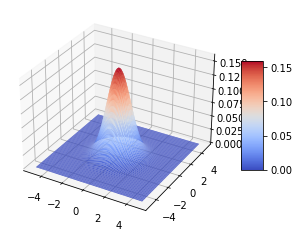

In [58]:
fig = plt.figure()

X = np.linspace(-5, 5, 100)
P = np.linspace(-5, 5, 100)
Z = state.wigner(0, X, P)
X, P = np.meshgrid(X, P)

ax = fig.add_subplot(111, projection="3d")
surface = ax.plot_surface(X, P, Z, cmap=cm.coolwarm, lw=0.5, rstride=1, cstride=1, linewidth=0, antialiased=True)
## colour maps
# - RdYlGn
# - magma

# fig.set_size_inches(4.8, 5)
# ax.set_axis_off()

# Add a color bar which maps values to colors.
fig.colorbar(surface, shrink=0.5, aspect=5)

# save a pic of the figure
plt.savefig("figures/vacuum.png", dpi=1080, transparent=True, bbox_inches='tight', pad_inches=0)


- Has +ve quasi-probability everywhere.
- Centered at 0 on both position $\hat{X}$ and momentum $\hat{P}$ axes

## **Squeezing Gate**

Can be thought of as transformation on position and momentum axes.

In [59]:
prog = sf.Program(1)
eng = sf.Engine('gaussian') 

with prog.context as q:
    S = Sgate(1)
    S | q[0]
    
state = eng.run(prog).state

#### **Plotting the 3D Wigner funtion of the squeezed state.**

Result of the action of a squeezed gate on a vacuum state

In [ ]:
fig = plt.figure()

X = np.linspace(-5, 5, 100)
P = np.linspace(-5, 5, 100)
Z = state.wigner(0, X, P)
X, P = np.meshgrid(X, P)

ax = fig.add_subplot(111, projection="3d")
surface = ax.plot_surface(X, P, Z, cmap=cm.coolwarm, lw=0.5, rstride=1, cstride=1, linewidth=0, antialiased=True)

# fig.set_size_inches(4.8, 5)
# ax.set_axis_off()

# Add a color bar which maps values to colors.
fig.colorbar(surface, shrink=0.5, aspect=5)

# save a pic of the figure
plt.savefig("figures/squeezed.png", dpi=1080, transparent=True, bbox_inches='tight', pad_inches=0)


## **Rotation Gate**

Rotates the phase space.

Shifts the $\hat{X}$ quadrature to $\left(\hat{X}\cos\phi - \hat{P}\sin\phi\right)$ and $\hat{P}$ quadrature to $\left(\hat{P}\cos\phi + \hat{X}\sin\phi\right)$.

Applying rotation gate to a coherent state

Rotation gate simply makes a rotation

In [ ]:
prog = sf.Program(1)
eng = sf.Engine('gaussian')

with prog.context as q:
    Dgate(1) | q[0]
    Rgate(np.pi/2) | q[0]
    
state = eng.run(prog).state

#### **Plotting the 3D Wigner funtion of a coherent state after rotation.**

In [ ]:
fig = plt.figure()

X = np.linspace(-5, 5, 100)
P = np.linspace(-5, 5, 100)
Z = state.wigner(0, X, P)
X, P = np.meshgrid(X, P)

ax = fig.add_subplot(111, projection="3d")
surface = ax.plot_surface(X, P, Z, cmap=cm.coolwarm, lw=0.5, rstride=1, cstride=1, linewidth=0, antialiased=True)

# fig.set_size_inches(4.8, 5)
# ax.set_axis_off()

# Add a color bar which maps values to colors.
fig.colorbar(surface, shrink=0.5, aspect=5)

# save a pic of the figure
plt.savefig("figures/rotation.png", dpi=1080, transparent=True, bbox_inches='tight', pad_inches=0)

## **Displacement Gate**

Has a specified complex value $\alpha$.

Shifts $\hat{X}$ by value proportional to $Re(\alpha)$ and the $\hat{P}$ by a value $Im(\alpha)$.

In [ ]:
prog = sf.Program(1)
eng = sf.Engine('gaussian')

with prog.context as q:
    Dgate(1.25) | q[0]
    
state = eng.run(prog).state

#### **Plotting the 3D Wigner funtion of a coherent state after displacement.**

In [ ]:
fig = plt.figure()

X = np.linspace(-5, 5, 100)
P = np.linspace(-5, 5, 100)
Z = state.wigner(0, X, P)
X, P = np.meshgrid(X, P)

ax = fig.add_subplot(111, projection="3d")
surface = ax.plot_surface(X, P, Z, cmap=cm.coolwarm, lw=0.5, rstride=1, cstride=1, linewidth=0, antialiased=True)

# fig.set_size_inches(4.8, 5)
# ax.set_axis_off()

# Add a color bar which maps values to colors.
fig.colorbar(surface, shrink=0.5, aspect=5)

# save a pic of the figure
plt.savefig("figures/displacement.png", dpi=1080, transparent=True, bbox_inches='tight', pad_inches=0)


As $\alpha$ increases in value, the state is displaced more to the right.

## **Cubic Phase Gate**

When running circuit containing any non-Gaussian gates, we use the Fock backend. We use argument "cutoff_dim" to tell Strawberry Fields where to limit the Fock space.

Cubic phase gate shifts $\hat{P}$ by $\gamma\hat{X}^2$ where $\gamma$ is a definable parameter but does no transform $\hat{X}$ in the phase space.

Let's set $\gamma = 2$

In [ ]:
prog = sf.Program(1)

# use the fock backend and define the argument cutoff_dim
eng = sf.Engine("fock", backend_options={"cutoff_dim":10})

with prog.context as q:
    gamma = 2
    Vgate(gamma) | q[0]
    
state = eng.run(prog).state

In [ ]:
fig = plt.figure()

X = np.linspace(-5, 5, 100)
P = np.linspace(-5, 5, 100)
Z = state.wigner(0, X, P)
X, P = np.meshgrid(X, P)

ax = fig.add_subplot(111, projection="3d")
surface = ax.plot_surface(X, P, Z, cmap=cm.coolwarm, lw=0.5, rstride=1, cstride=1, linewidth=0, antialiased=True)

# fig.set_size_inches(4.8, 5)
# ax.set_axis_off()

# Add a color bar which maps values to colors.
fig.colorbar(surface, shrink=0.5, aspect=5)

# save a pic of the figure
plt.savefig("figures/cubic_phase.png", dpi=1080, transparent=True, bbox_inches='tight', pad_inches=0)


## **Kerr Gate**

In the Fock basis, rotation gate acts with $e^{i\phi\hat{n}}$.

In comparison, Kerr gates tranform with $e^{i\phi\kappa\hat{n}^2}$. The $^2$ makes the state non-Gaussian and thus transforms the shape of the state significantly.

In [ ]:
prog = sf.Program(1)

# use the fock backend and define the argument cutoff_dim
eng = sf.Engine("fock", backend_options={"cutoff_dim":10})

with prog.context as q:
    kappa = 1
    Dgate(1) | q[0]
    Kgate(kappa) | q[0]
    
state = eng.run(prog).state

In [ ]:
fig = plt.figure()

X = np.linspace(-5, 5, 100)
P = np.linspace(-5, 5, 100)
Z = state.wigner(0, X, P)
X, P = np.meshgrid(X, P)

ax = fig.add_subplot(111, projection="3d")
surface = ax.plot_surface(X, P, Z, cmap=cm.coolwarm, lw=0.5, rstride=1, cstride=1, linewidth=0, antialiased=True)

# fig.set_size_inches(4.8, 5)
# ax.set_axis_off()

# Add a color bar which maps values to colors.
fig.colorbar(surface, shrink=0.5, aspect=5)

# save a pic of the figure
plt.savefig("figures/cubic_phase.png", dpi=1080, transparent=True, bbox_inches='tight', pad_inches=0)


The coherent state is morphed after the Kerr gate is applied at different strengths.